# Download data from Zenodo record

In this notebook, we are going to query a Zenodo record and download data files from the record.

The record we are going to access data about Martian craters (Chiara Marmo and Anthony Lagain, 2020), and eventually visualize the craters on top of a CTX image we download from ADAM-Space we downloaded in another notebook [search_and_download_data_product_from_adam](../adam/search_and_download_data_products_from_adam.ipynb).

The Zenodo record we are going to access is at https://zenodo.org/record/3633594, and the CTX image is `P01_001388_2034_XI_23N017W`.

#### Software Requirements

- __[Zenodo-Client](https://pypi.org/project/zenodo-client)__ (version 0.2.0)
- __[Geopandas](https://geopandas.org)__ (version 0.11.1)
- __[Rasterio](https://rasterio.readthedocs.io/en/latest/index.html)__ (version 1.3.2)

<div class="alert alert-block alert-info">
    <b>Note:</b> 
    All Zenodo API requests must be authenticated. That means we need a personal token to request information about record(s).
    If you don't have a token yet, once logged in your Zenodo account, go to 
    <a href="https://zenodo.org/account/settings/applications/tokens/new/" target="_blank">
        <tt>[Account > Applications > New]</tt>
    </a> 
    to create one. In this notebook, we are only going to request data (<i>i.e.</i> read only), and <i>not</i> create/upload/modify records; In this case, it is sufficient to check the '<tt>user:email</tt>' scope while creating this new token. Name it however you please, "jupyter notebook" could be it. <i>You can create (and then delete) as many tokens as you want!</i>
</div>
<div class="alert alert-block alert-warning">
    Never publish a (private) token, through a Jupyter Notebook, for example, that you eventually decide to make public.
    Otherwise, anybody could use to impersonate you! There are different ways to hide the token from the public, the easiest one it to create a small Python file with the token inside, and then <i>import</i> it (like I do below, with the file '<tt>zenodo_token.py</tt>'.
</div>


In [1]:
from zenodo_token import ZENODO_TOKEN

In [2]:
# Initialize the client that will interface Zenodo API servers
#
from zenodo_client.api import Zenodo

zenodo = Zenodo(ZENODO_TOKEN)
zenodo

### Get record metadata

For the record of our interest, `3633594`, let's request its metadata.

In [3]:
record_id = '3633594'

In [4]:
record = zenodo.get_record(record_id)
record

<Response [200]>

The answer we get from `get_record()` is a __[Requests Response](https://requests.readthedocs.io/en/latest/user/quickstart/#response-content)__ object. Details apart, it is sufficient to know that (_i_) a code `200` means the resquest succeeded, and (_ii_) that we can get the actual content of the response through the method `.json()`.

In [5]:
record_meta = record.json()
record_meta

{'conceptdoi': '10.5281/zenodo.1203252',
 'conceptrecid': '1203252',
 'created': '2020-02-01T07:35:32.407734+00:00',
 'doi': '10.5281/zenodo.3633594',
 'files': [{'bucket': '685a099f-4251-4453-9255-301a86718f52',
   'checksum': 'md5:e6c04d24b40981b971a2268f85735a28',
   'key': 'Lagain_GSA_database.zip',
   'links': {'self': 'https://zenodo.org/api/files/685a099f-4251-4453-9255-301a86718f52/Lagain_GSA_database.zip'},
   'size': 61061840,
   'type': 'zip'}],
 'id': 3633594,
 'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.3633594.svg',
  'bucket': 'https://zenodo.org/api/files/685a099f-4251-4453-9255-301a86718f52',
  'conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.1203252.svg',
  'conceptdoi': 'https://doi.org/10.5281/zenodo.1203252',
  'doi': 'https://doi.org/10.5281/zenodo.3633594',
  'html': 'https://zenodo.org/record/3633594',
  'latest': 'https://zenodo.org/api/records/3633594',
  'latest_html': 'https://zenodo.org/record/3633594',
  'self': 'https://zen

Effectively, as you can see, we just got all the information (metadata) associated to record `3633594`. Including versions, authors references; The description, for instance:

In [6]:
record_meta['metadata']['description']

'<p>Submitted to GSA LMI VI&nbsp;with coherent file renaming</p>'

And -- of our main interest here -- the list of files deposited:

In [7]:
record_files = record_meta['files']
record_files

[{'bucket': '685a099f-4251-4453-9255-301a86718f52',
  'checksum': 'md5:e6c04d24b40981b971a2268f85735a28',
  'key': 'Lagain_GSA_database.zip',
  'links': {'self': 'https://zenodo.org/api/files/685a099f-4251-4453-9255-301a86718f52/Lagain_GSA_database.zip'},
  'size': 61061840,
  'type': 'zip'}]

> There is _one_ file in the record, its name is `'Lagain_GSA_database.zip'`, of size `61061840` bytes (61 Mb).

To download the file we should then specify the _record-id_ and the _file name_.

In [8]:
local_file = zenodo.download(record_id, 'Lagain_GSA_database.zip')
local_file

PosixPath('/Users/chbrandt/.data/zenodo/1203252/2.2/Lagain_GSA_database.zip')

> The Zenodo-Client library is designed to keep all data record in a structures of directories formed by the _record-id_ and _version_ (latest, if not specified).

Before unpacking the zip file, let's have a look on what's inside.

In [9]:
import zipfile

with zipfile.ZipFile(local_file,"r") as fp:
    fp.printdir()

File Name                                             Modified             Size
Crater_counting/                               2020-01-31 16:48:46            0
Crater_counting/lagain_db_cratertools_filtered.json.zip 2019-01-22 01:57:38      7602692
Crater_counting/lagain_db_cratertools_filtered.zip 2019-01-22 01:57:38     13352666
Crater_counting/README.md                      2020-01-31 16:51:12          980
Global/                                        2020-01-31 17:22:22            0
Global/lagain_db.json/                         2020-01-31 16:52:40            0
Global/lagain_db.json/lagain_db.json           2020-01-31 17:14:20    105934013
Global/lagain_db/                              2020-01-31 16:52:34            0
Global/lagain_db/lagain_db/                    2020-01-31 17:28:20            0
Global/lagain_db/lagain_db/lagain_db.dbf       2020-01-31 17:07:20    421886776
Global/lagain_db/lagain_db/lagain_db.prj       2019-01-21 18:01:56          148
Global/lagain_db/lagain_db/

> Although from the description of the record doesn't explain the files content, we can get from the _related identifiers_ :

In [10]:
record_meta['metadata']['related_identifiers'][0]['identifier']

'https://github.com/alagain/martian_crater_database/tree/2.1'

> There, we learn and decide that we want the _filtered_ Mars craters. In particular, I'll choose the (global) JSON file for simplicity and unpack it to the current directory ("."):

In [11]:
with zipfile.ZipFile(local_file,"r") as fp:
    mars_craters_file = fp.extract('Global/lagain_db_filtered.json/lagain_db_filtered.json', path='.')

mars_craters_file

'Global/lagain_db_filtered.json/lagain_db_filtered.json'

### Visualize Mars craters table

Now that we got Marmo & Lagain (2020) database of (_filtered_) Mars craters, let's see what's inside. To do that, we are going to use Geopandas.

The Mars craters database (https://zenodo.org/record/3633594) provides central location and the radius for more than 300k craters all over the planet. We are going to use the "filtered" GeoJSON file provided by the database

In [12]:
import geopandas

craters = geopandas.read_file(mars_craters_file, driver='GeoJSON')
craters

,CRATER_ID,RADIUS,X,Y,TYPE,STATUS,LRD_MORPH,ORIGIN,ADDING,geometry
0,200-007,500.0,23.671499,-43.584301,1.0,Other,None,None,1.0,POINT (23.67150 -43.58430)
1,200-008,500.0,68.432404,-39.950500,1.0,Other,None,None,1.0,POINT (68.43240 -39.95050)
2,200-009,500.0,177.154007,-0.758709,1.0,Other,None,None,1.0,POINT (177.15401 -0.75871)
3,200-010,500.0,34.128899,-31.406401,1.0,Other,None,None,1.0,POINT (34.12890 -31.40640)
4,100-001,500.0,-52.963100,47.302601,1.0,Other,None,None,1.0,POINT (-52.96310 47.30260)
...,...,...,...,...,...,...,...,...,...,...
376432,13-000940,4895.0,70.753998,22.677999,4.0,Secondary,None,None,0.0,POINT (70.75400 22.67800)
376433,13-000871,5210.0,61.212002,16.076000,4.0,Secondary,None,None,0.0,POINT (61.21200 16.07600)
376434,13-000729,6055.0,61.089001,15.822000,4.0,Secondary,None,None,0.0,POINT (61.08900 15.82200)
376435,13-000726,6075.0,61.083000,15.975000,4.0,Secondary,None,None,0.0,POINT (61.08300 15.97500)


In [13]:
# Coordinates Reference System

craters.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The database is quite big, with more than 300k craters (376437, actually). Plotting them all would be a bit too much, so let's plot a small, uniformly sampled, sub-set:

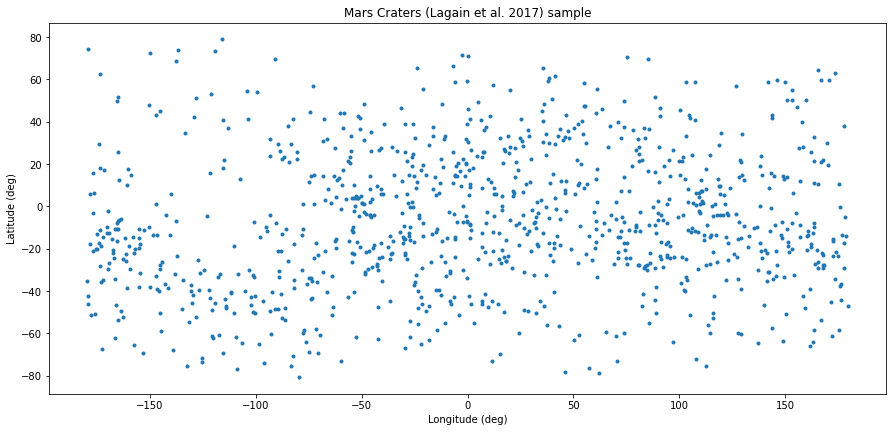

In [14]:
# General/sample view

ax = craters.sample(1000).plot(marker='.', figsize=(15,10))
ax.set_xlabel('Longitude (deg)')
ax.set_ylabel('Latitude (deg)')
ax.set_title('Mars Craters (Lagain et al. 2017) sample');

**Note:**

> Craters location are in degrees. GeoJSON files provide geometries/coordinates in _degrees_; By definition, the coordinates in there are considered to be in WGS84 (CRS), covering positions from -180:180 (longitude), -90:90 (latitude).

#### MRO/CTX image overplot

The application of the Mars craters database in this notebook is a visualization on top of Mars images. In another notebook (see ../adam) we downloaded a CTX image provided by ADAM-Space (https://explorer-space.adamplatform.eu), ADAM provides fully reduced, sciece-ready images of Mars in GeoTIFF format, which allows us to use them right away.

The CTX image data product we are going to use here -- for no particular reason -- is the one with id `P01_001388_2034_XI_23N017W`.

In [15]:
ctx_image = 'data/reduced/ctx/P01_001388_2034_XI_23N017W.tif'

In [16]:
import rasterio

ctx_src = rasterio.open(ctx_image)
ctx_src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028226550889045e+38,
 'width': 5466,
 'height': 7590,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["sinusoidal Mars",GEOGCS["GCS_Mars",DATUM["D_Mars",SPHEROID["Mars",3396190,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",343],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(6.0, 0.0, -43560.0,
        0.0, -6.0, 1401990.0)}

**Note:**

> CTX image products as provided by ADAM Space-Explorer platform are projected in a (sinusoidal) projection representing coordinates in meters. When we combine with the craters database (in WGS84), we should bring each and both to the same projection.

/opt/miniconda3/envs/invenio_tools/lib/python3.10/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


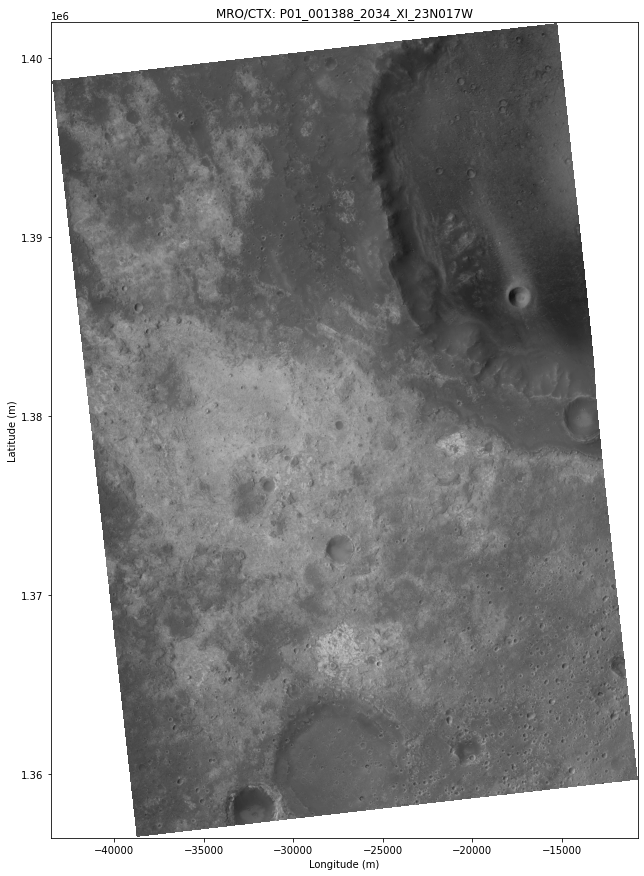

In [17]:
from rasterio import plot as rplot
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(15,15))

ax = rplot.show(ctx_src, ax=ax, cmap='gray')
ax.set_xlabel('Longitude (m)')
ax.set_ylabel('Latitude (m)')
ax.set_title('MRO/CTX: P01_001388_2034_XI_23N017W');

## Reproject Craters (deg) to Raster's CRS (meters)

The craters coordinates are _assumed_ (here, by Geopandas) to be in WGS84 because that how GeoJSON is defined (https://datatracker.ietf.org/doc/html/rfc7946). Sure enough, the coordinates of our Mars craters are _not_ in WGS84 but in Mars polar coordinates, also centered in 0, east-positive (-180:180).

What we have to do is to associate the equivalent coordinates system to Mars. The simplest reference system, defining de ellipsoid and coordinates limits and units is IAU-2000's (Mars) 49900 (https://spatialreference.org/ref/iau2000/49900/):
```
GEOGCS["Mars 2000",
    DATUM["D_Mars_2000",
        SPHEROID["Mars_2000_IAU_IAG",3396190.0,169.89444722361179]],
    PRIMEM["Greenwich",0],
    UNIT["Decimal_Degree",0.0174532925199433]]
```

In [18]:
iau2000_mars_wkt = """
GEOGCS["Mars 2000",
    DATUM["D_Mars_2000",
        SPHEROID["Mars_2000_IAU_IAG",3396190.0,169.89444722361179]],
    PRIMEM["Greenwich",0],
    UNIT["Decimal_Degree",0.0174532925199433]
]"""

In [19]:
craters_reproj_deg = craters.set_crs(iau2000_mars_wkt, allow_override=True)
craters_reproj_deg

,CRATER_ID,RADIUS,X,Y,TYPE,STATUS,LRD_MORPH,ORIGIN,ADDING,geometry
0,200-007,500.0,23.671499,-43.584301,1.0,Other,None,None,1.0,POINT (23.67150 -43.58430)
1,200-008,500.0,68.432404,-39.950500,1.0,Other,None,None,1.0,POINT (68.43240 -39.95050)
2,200-009,500.0,177.154007,-0.758709,1.0,Other,None,None,1.0,POINT (177.15401 -0.75871)
3,200-010,500.0,34.128899,-31.406401,1.0,Other,None,None,1.0,POINT (34.12890 -31.40640)
4,100-001,500.0,-52.963100,47.302601,1.0,Other,None,None,1.0,POINT (-52.96310 47.30260)
...,...,...,...,...,...,...,...,...,...,...
376432,13-000940,4895.0,70.753998,22.677999,4.0,Secondary,None,None,0.0,POINT (70.75400 22.67800)
376433,13-000871,5210.0,61.212002,16.076000,4.0,Secondary,None,None,0.0,POINT (61.21200 16.07600)
376434,13-000729,6055.0,61.089001,15.822000,4.0,Secondary,None,None,0.0,POINT (61.08900 15.82200)
376435,13-000726,6075.0,61.083000,15.975000,4.0,Secondary,None,None,0.0,POINT (61.08300 15.97500)


In [20]:
craters_reproj_deg.crs

<Geographic 2D CRS: 
GEOGCS["Mars 2000",
    DATUM["D_Mars_2000",
     ...>
Name: Mars 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Decimal_Degree)
- lat[north]: Latitude (Decimal_Degree)
Area of Use:
- undefined
Datum: D_Mars_2000
- Ellipsoid: Mars_2000_IAU_IAG
- Prime Meridian: Greenwich

> Notice the CRS of the new (craters) table: it is still in degrees, but now using the Martian ellipsoid.

Next, we reproject it to the same CRS as the CTX image:

In [21]:
craters_reproj_m = craters_reproj_deg.to_crs(ctx_src.crs)
craters_reproj_m

,CRATER_ID,RADIUS,X,Y,TYPE,STATUS,LRD_MORPH,ORIGIN,ADDING,geometry
0,200-007,500.0,23.671499,-43.584301,1.0,Other,None,None,1.0,POINT (1746282.328 -2583446.259)
1,200-008,500.0,68.432404,-39.950500,1.0,Other,None,None,1.0,POINT (3882044.392 -2368053.803)
2,200-009,500.0,177.154007,-0.758709,1.0,Other,None,None,1.0,POINT (-9829609.198 -44972.246)
3,200-010,500.0,34.128899,-31.406401,1.0,Other,None,None,1.0,POINT (2586637.324 -1861604.920)
4,100-001,500.0,-52.963100,47.302601,1.0,Other,None,None,1.0,POINT (-1445563.120 2803847.366)
...,...,...,...,...,...,...,...,...,...,...
376432,13-000940,4895.0,70.753998,22.677999,4.0,Secondary,None,None,0.0,POINT (4799436.897 1344231.531)
376433,13-000871,5210.0,61.212002,16.076000,4.0,Secondary,None,None,0.0,POINT (4454703.336 952900.037)
376434,13-000729,6055.0,61.089001,15.822000,4.0,Secondary,None,None,0.0,POINT (4453336.018 937844.264)
376435,13-000726,6075.0,61.083000,15.975000,4.0,Secondary,None,None,0.0,POINT (4449608.149 946913.293)


#### Select craters

Since our goal is to overplot the craters on top of the current Mars image, it is natural to filter out all the craters not in the same region to keep only the ones of interest. We are going to use the (CTX) image bounding-box to do so using the GeoDataframe `cx` attribute:

In [22]:
xmin, ymin, xmax, ymax = ctx_src.bounds

craters_select = craters_reproj_m.cx[xmin:xmax, ymin:ymax]
craters_select

,CRATER_ID,RADIUS,X,Y,TYPE,STATUS,LRD_MORPH,ORIGIN,ADDING,geometry
154389,11-008387,765.0,-17.313000,23.400999,1.0,Other,None,None,0.0,POINT (-17026.955 1387087.137)
169650,11-007526,825.0,-17.205999,23.048000,1.0,Other,None,None,0.0,POINT (-11235.850 1366163.229)
172916,11-007296,840.0,-17.497999,23.158001,1.0,Other,None,None,0.0,POINT (-27140.234 1372683.505)
205174,11-005350,1040.0,-17.365999,22.972000,1.0,Other,None,None,0.0,POINT (-19974.014 1361658.352)
226455,11-004063,1265.0,-17.245001,23.285000,1.0,Other,None,None,0.0,POINT (-13339.513 1380211.332)
240704,11-003247,1515.0,-17.778999,23.636999,1.0,Other,None,None,0.0,POINT (-42301.039 1401075.966)
245495,11-002964,1630.0,-17.586000,22.913000,1.0,Other,None,None,0.0,POINT (-31994.282 1358161.144)
309505,11-001230,3845.0,-17.497999,22.952999,3.0,Buried,None,None,0.0,POINT (-27181.596 1360532.073)
317716,11-000306,12670.0,-17.247999,23.516001,3.0,Buried,None,None,0.0,POINT (-13479.206 1393903.846)


> 9 craters fall in the same region of the image, now we can plot them on top of each other:

/opt/miniconda3/envs/invenio_tools/lib/python3.10/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


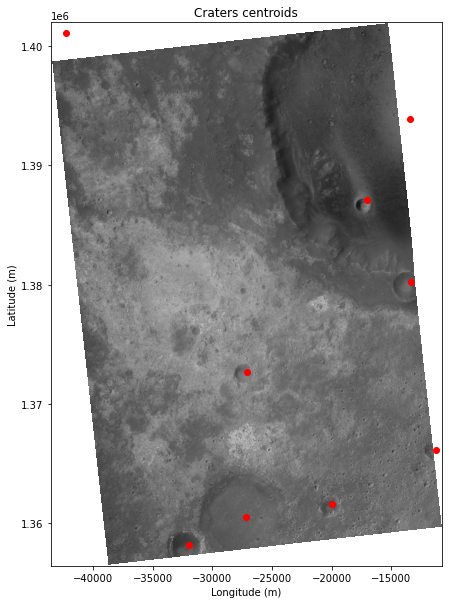

In [23]:
fig, ax = pyplot.subplots(figsize=(10,10))

rplot.show(ctx_src, ax=ax, cmap='gray');
craters_select.plot(ax=ax, color='red')

ax.set_xlabel('Longitude (m)')
ax.set_ylabel('Latitude (m)')
ax.set_title('Craters centroids');

#### Size the craters

The plot above -- and the whole workflow so far -- is quite nice. But we can go one step further to get an even more interesting outcome from the dataset at hand: we can use the craters _radii_ information to have a better view of them.

In [24]:
craters_select['buffer'] = craters_select.apply(lambda r:r.geometry.buffer(r.RADIUS), axis=1)

craters_select

/opt/miniconda3/envs/invenio_tools/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CRATER_ID,RADIUS,X,Y,TYPE,STATUS,LRD_MORPH,ORIGIN,ADDING,geometry,buffer
154389,11-008387,765.0,-17.313000,23.400999,1.0,Other,None,None,0.0,POINT (-17026.955 1387087.137),"POLYGON ((-16261.955 1387087.137, -16265.639 1..."
169650,11-007526,825.0,-17.205999,23.048000,1.0,Other,None,None,0.0,POINT (-11235.850 1366163.229),"POLYGON ((-10410.850 1366163.229, -10414.822 1..."
172916,11-007296,840.0,-17.497999,23.158001,1.0,Other,None,None,0.0,POINT (-27140.234 1372683.505),"POLYGON ((-26300.234 1372683.505, -26304.279 1..."
205174,11-005350,1040.0,-17.365999,22.972000,1.0,Other,None,None,0.0,POINT (-19974.014 1361658.352),"POLYGON ((-18934.014 1361658.352, -18939.022 1..."
226455,11-004063,1265.0,-17.245001,23.285000,1.0,Other,None,None,0.0,POINT (-13339.513 1380211.332),"POLYGON ((-12074.513 1380211.332, -12080.604 1..."
240704,11-003247,1515.0,-17.778999,23.636999,1.0,Other,None,None,0.0,POINT (-42301.039 1401075.966),"POLYGON ((-40786.039 1401075.966, -40793.334 1..."
245495,11-002964,1630.0,-17.586000,22.913000,1.0,Other,None,None,0.0,POINT (-31994.282 1358161.144),"POLYGON ((-30364.282 1358161.144, -30372.131 1..."
309505,11-001230,3845.0,-17.497999,22.952999,3.0,Buried,None,None,0.0,POINT (-27181.596 1360532.073),"POLYGON ((-23336.596 1360532.073, -23355.111 1..."
317716,11-000306,12670.0,-17.247999,23.516001,3.0,Buried,None,None,0.0,POINT (-13479.206 1393903.846),"POLYGON ((-809.206 1393903.846, -870.215 13926..."


/opt/miniconda3/envs/invenio_tools/lib/python3.10/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


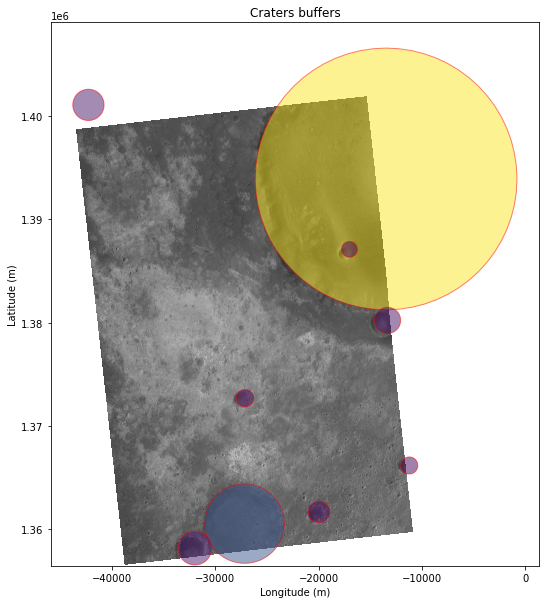

In [25]:
fig, ax = pyplot.subplots(figsize=(10,10))

rplot.show(ctx_src, ax=ax, cmap='gray');
ax = (
    craters_select.set_geometry('buffer')
    .sort_values('RADIUS', ascending=False)
    .plot(ax=ax, alpha=0.5, column=craters_select.RADIUS, linewidth=1, edgecolor='red')
)

ax.set_xlabel('Longitude (m)')
ax.set_ylabel('Latitude (m)')
ax.set_title('Craters buffers');

## Conclusion

In this notebook we showed how to access a Zenodo record data and how to download a file deposited in the record using the Zenodo-Client library. We then used the downloaded data -- Martian craters by Marmo & Lagain (2020) --, together with a Martian image from the CTX instrument provided by ADAM-Space to realistically inspect the position and size of the craters in the same region.

Through this notebook, during the data management, we also learned how to reproject vector data between two different ellipsoids (Earth/WGS84 to Mars/IAU2000) and coordinate units (degrees to meters), and how to use specific methods of GeoPandas to select rows inside a bounding-box as well as creating a _buffer_ representation of point geometries ("real" size craters).